# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

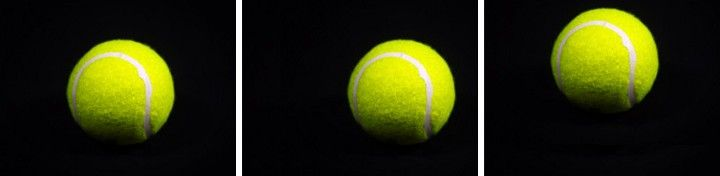



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [ ]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #python image library
from urllib.request import urlopen #Lets you read an email address

First we upload an image from the internet

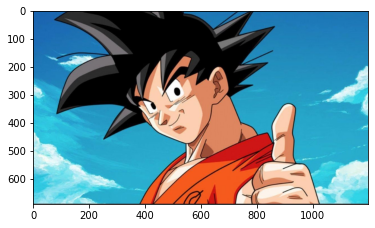

In [ ]:
url = 'https://static.t13.cl/images/original/2019/05/1557689182-goku.jpg'
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


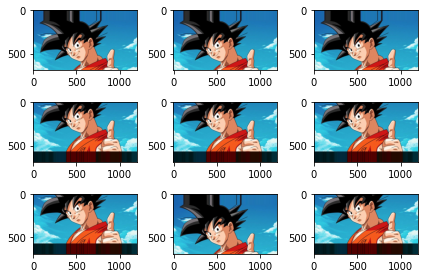

In [ ]:
# We convert the image to an arrangement
data = img_to_array(img)
# we make an expansion to a sample 
samples = expand_dims(data, 0)
# We create the data augmenter using only image change
datagen = ImageDataGenerator(height_shift_range=[-120,120])
# we prepare the iterator
it = datagen.flow(samples, batch_size=1)
# we generate samples and display the results
for i in range(9):
	plt.subplot(330 + 1 + i)
	# batches of images are generated
	batch = it.next()
	image = batch[0].astype('uint8') #it is converted to a valid value to be able to display it as an image
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to invert the rows or columns of pixels in the case of a vertical or horizontal flip, respectively. The increase is specified by a Boolean argument **horizontal_flip** o **vertical_flip** for the class **ImageDataGenerator.**

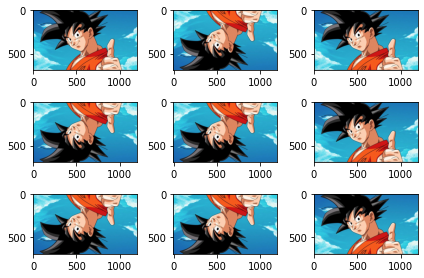

In [ ]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is uniformly randomly sampled from the zoom region for each dimension (width, heigth) separately.

Float or [lower limit, upper limit]. Random zoom range. If it is a floating, [lower limit, upper limit] = [1-zoom_range, 1 + zoom_range]

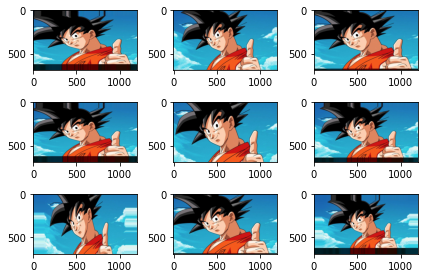

In [ ]:
datagen = ImageDataGenerator(zoom_range=0.3) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside the image frame, leaving areas of the frame with no pixel data, which need to be filled.

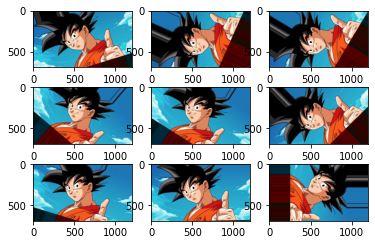

In [ ]:
datagen = ImageDataGenerator(rotation_range=130)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Channel Shift Range: Range for Randmon channeles shifts

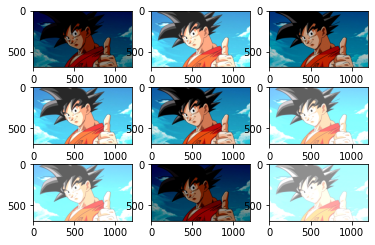

In [ ]:
datagen = ImageDataGenerator(channel_shift_range= 160)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Shear Range: The shear anfle im counter-clockwise direction in degrees

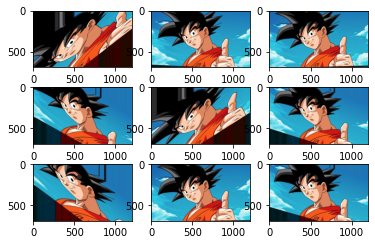

In [ ]:
datagen = ImageDataGenerator(shear_range=70)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the accuracy of the job.



              featurewise_center: Boolean, set the mean of each element to zero of all data.
          samplewise_center**: Boolean, set the mean of each sample to zero
          featurewise_std_normalization: Boolean, Divide the entries by the standard deviation (std.) Of the data set, based on the characteristics.
          samplewise_std_normalization: Boolean, divide each data by its std.
          zca_epsilon: The default is 1e-6.
          zca_whitening: Boleano, indicates if bleaching is applied ZCA.            

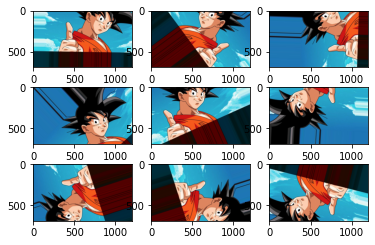

In [ ]:
datagen = ImageDataGenerator(
            rotation_range               = 110,
            width_shift_range            = [140,140],   
            height_shift_range           = [180,180],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the necessary work is not that simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely. There are some libraries that can help us to carry out this task, we will start by analyzing the following :

1.   Text Attack
2.   Google Trans

# **TextAttack**

It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [ ]:
!pip install textattack

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 102kB 6.8MB/s 
     |████████████████████████████████| 153kB 9.3MB/s 
     |████████████████████████████████| 1.7MB 12.4MB/s 
     |████████████████████████████████| 317kB 22.4MB/s 
     |████████████████████████████████| 3.0MB 19.9MB/s 
     |████████████████████████████████| 245kB 42.0MB/s 
     |████████████████████████████████| 235kB 39.2MB/s 
     |████████████████████████████████| 1.1MB 33.1MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 778kB 44.9MB/s 
     |████████████████████████████████| 686kB 42.5MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 245kB 31.1MB/s 
     |████████████████████████████████| 17.3MB 236kB/s 
     |████████████████████████████████| 163kB 43.6MB/s 
     |████████████████████████████████| 102kB 9.9MB/s 
     |████████████████████████████████| 122kB 43.5MB/s 


In [ ]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-16 22:30:38 INFO: Downloading default packages for language: en (English)...
2020-10-16 22:34:20 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
text = "When we get to the end, I hope all is well. Do you think the same?"


TextAttack provides us with four methods for data augmentation.


# **WordNetAugmenter**

Augment the text by replacing it with synonyms from the thesaurus (dictionary of synonyms) of WordNet.

WordNet is a lexical database of English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept. WordNet superficially resembles a thesaurus, grouping words based on their meaning.



In [ ]:
aug = WordNetAugmenter();
aug.augment(text)

['When we get to the conclusion, I hope all is well. Do you think the same?']

# **EmbeddingAugmenter**
Augments text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0,8


In [ ]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:06<00:00, 69.9MB/s]
textattack: Unzipping file /root/.cache/textattack/tmp89keetnr.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['When we get to the terminates, I hope all is well. Do you think the same?']

## CharSwapAugmenter

Increase text by substituting, deleting, inserting, and swapping adjacent characters..

In [ ]:
aug = CharSwapAugmenter()
aug.augment(text)

['When we get to the end, I hope all is wull. Do you think the same?']


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods


In [ ]:
aug = EasyDataAugmenter()
aug.augment(text)

['When we Saame get to the end, I hope all is well. Do you think the same?',
 'When we get to the end, I hope all is well. Do you the same?',
 'When we get to the end, I hope all is comfortably. Do you think the same?',
 'When we get to the end, I hope all you well. Do is think the same?']


Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the method **translate** () are::



1.   **src**: Source language. this parameter is optional since googletrans will detect it.
2. **dest**: target language. Mandatory parameter.

3. **text**: the text to be translated from the source language to the target language. Mandatory parameter.



When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.

Supported languages ​​can be found in https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results it is recommended to do some tests with the languages, if the target language is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a problem. try and failure.


Some examples of languages are:


*   Afrikáans	'af'

*   Chino (simplificado) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japonés	'ja'
*   Latín	'la'


*   Español	'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 2.6MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 
     |████████████████████████████████| 972kB 4.7MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 71kB 5.2MB/s 
     |████████████████████████████████| 102kB 6.0MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=4500ddf7d7b1a9711d9130e5d2ec267a618bddd11a616af60a870598c35d3967
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=c6160d7f2e6c5b56b9e8b7dd1f6da52470333df7f4e38fa3ce39a166cf619f3a
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
origin_text = "My drill is the drill that pierces the heavens! Never forget: this drill will create a hole in the universe! With it we will clear the way for those who will follow us.."
text_trans = translator.translate(text=origin_text, dest='la').text
final=translator.translate(text=text_trans, dest='ja').text
print(origin_text)
print(text_trans)
print(final)

My drill is the drill that pierces the heavens! Never forget: this drill will create a hole in the universe! With it we will clear the way for those who will follow us..
Terebro terebro mea est enim intrabit in caelum? Numquam obliviscar: Hoc terebro: et ecce foramen unum in universum creandum? Cum enim nos purgare viam eorum, qui nos sequentur ..
空に入るドリルドリル鉱山？決して忘れないでください：このドリルは宇宙に穴を作りますか？私たちが私たちに従う人々の道をクリアしなければならないときのために..


In [ ]:
origin_text = "My drill is the drill that pierces the heavens! Never forget: this drill will create a hole in the universe! With it we will clear the way for those who will follow us.."
text_trans = translator.translate(text=origin_text, dest='zh-CN').text
final=translator.translate(text=text_trans, dest='es').text
print(origin_text)
print(text_trans)
print(final)

My drill is the drill that pierces the heavens! Never forget: this drill will create a hole in the universe! With it we will clear the way for those who will follow us..
我的钻是刺穿天堂的钻！永远不要忘记：这种钻探会在宇宙中造成一个洞！有了它，我们将为跟随我们的人们扫清道路。
¡Mi taladro es el que atravesó el cielo! Nunca lo olvides: ¡este tipo de perforación creará un agujero en el universo! Con él, despejaremos el camino para quienes nos sigan.
